<a href="https://www.kaggle.com/code/nayanesenhorinha/criptomoedas?scriptVersionId=185454745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importação e Limpeza de Dados
- Preparação do ambiente de trabalho
- Importação dos dados
- Limpeza de dados
- Formatando valores

### Preparação do ambiente de trabalho
Instalação das bibliotecas Python necessárias: Pandas, Numpy, Matplotlib, etc.

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests
from io import BytesIO
import warnings

### Importação dos dados
Uso do Pandas para ler os arquivos CSV contendo os dados históricos de criptomoedas.

Lendo os datasets:

In [58]:
cryptos = [
    "coin_Aave.csv",
    "coin_BinanceCoin.csv",
    "coin_Bitcoin.csv",
]

dataframes = []

base_url = 'https://raw.githubusercontent.com/gabrielxvnx/M3_GRUPO/main/data/'

for crypto in cryptos:
    url = base_url + crypto
    response = requests.get(url)

    if response.status_code == 200:
        content = BytesIO(response.content)
        df = pd.read_csv(content, decimal=',')
        dataframes.append(df)
    else:
        print(f"Failed to retrieve {crypto}. Status code: {response.status_code}")
        print(f"Arquivo {crypto} não encontrado no GitHub.")

Unindo todos os datasets em 1 dataframe:

In [59]:
dataframe_combinado = pd.concat(dataframes, ignore_index=True)
df = dataframe_combinado.copy()

### Limpeza dos dados
- Convertendo para conter somente a Data
- Removendo colunas que não utilizaremos
- Traduzindo colunas

In [60]:
# Convertendo para conter somente a data
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [61]:
# Removendo colunas que não serão utilizadas
del df['SNo']

In [62]:
traducao = {"Name": "nome",
            "Date": "data",
            "High": "alta",
            "Low": "baixa",
            "Open": "abertura",
            "Close": "fechamento",
            "Volume": "volume",
            "Symbol": "simbolo",
            "Marketcap": "marketcap",} # Gerando dicionario para tradução
df.rename(columns=traducao, inplace=True)# Renomeando

### Formatando valores
Identificando os formatos dos dados, e convertendo para float.

In [63]:
df.dtypes

nome          object
simbolo       object
data          object
alta          object
baixa         object
abertura      object
fechamento    object
volume        object
marketcap     object
dtype: object

In [64]:
def format_str(x):
    try:
        return '{:.2f}'.format(float(x))  
    except ValueError:
        return x 

columns_to_format = ['alta', 'baixa', 'abertura', 'fechamento', 'volume', 'marketcap']
df[columns_to_format] = df[columns_to_format].applymap(format_str)

df[columns_to_format] = df[columns_to_format].astype(float)

/tmp/ipykernel_33/4291570712.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_format] = df[columns_to_format].applymap(format_str)


In [65]:
df.dtypes

nome           object
simbolo        object
data           object
alta          float64
baixa         float64
abertura      float64
fechamento    float64
volume        float64
marketcap     float64
dtype: object

### Selecionando dez criptomoedas

In [69]:
cripto_10 = ['Aave',
'Binance Coin',
'Bitcoin'
]

criptocopy = df[df['nome'].isin(cripto_10)].reset_index(drop=True)
criptocopy

,nome,simbolo,data,alta,baixa,abertura,fechamento,volume,marketcap
0,Aave,AAVE,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
4703,Bitcoin,BTC,2021-07-02,33939.59,32770.68,33549.60,33897.05,3.872897e+10,6.354508e+11
4704,Bitcoin,BTC,2021-07-03,34909.26,33402.70,33854.42,34668.55,2.438396e+10,6.499397e+11
4705,Bitcoin,BTC,2021-07-04,35937.57,34396.48,34665.56,35287.78,2.492431e+10,6.615748e+11
4706,Bitcoin,BTC,2021-07-05,35284.34,33213.66,35284.34,33746.00,2.672155e+10,6.326962e+11


Verificando as moedas selecionadas:

In [70]:
criptocopy['nome'].unique() 

array(['Aave', 'Binance Coin', 'Bitcoin'], dtype=object)

Criando arquivo csv com as moedas selecionadas:

In [71]:
criptocopy.to_csv("allcoin.csv", index=False)

## Análise exploratória dos dados
- Análise descritiva
- Análise temporal
- Análise comparativa

### Análise descritiva
Cálculo de estatísticas descritivas básicas (média, mediana, desvio padrão). Visualização de dados usando histogramas e boxplots.

### Análise temporal
Observar tendências ao longo do tempo.

### Análise comparativa
Comparação das criptomoedas.

## Respondendo perguntas da análise
- Tendência geral dos valores
- Valores médios
- Maiores quedas e valorizações
- Tendência por dia da semana
- Moeda mais e menos interessante (melhor e pior valorização)
- Correlação entre criptomoedas
- Variação de preços em relação ao volume de negociação (extra)
- Análise de desempenho semanal (extra)
- Quais criptomoedas apresentaram maior volatilidade (extra)

### Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

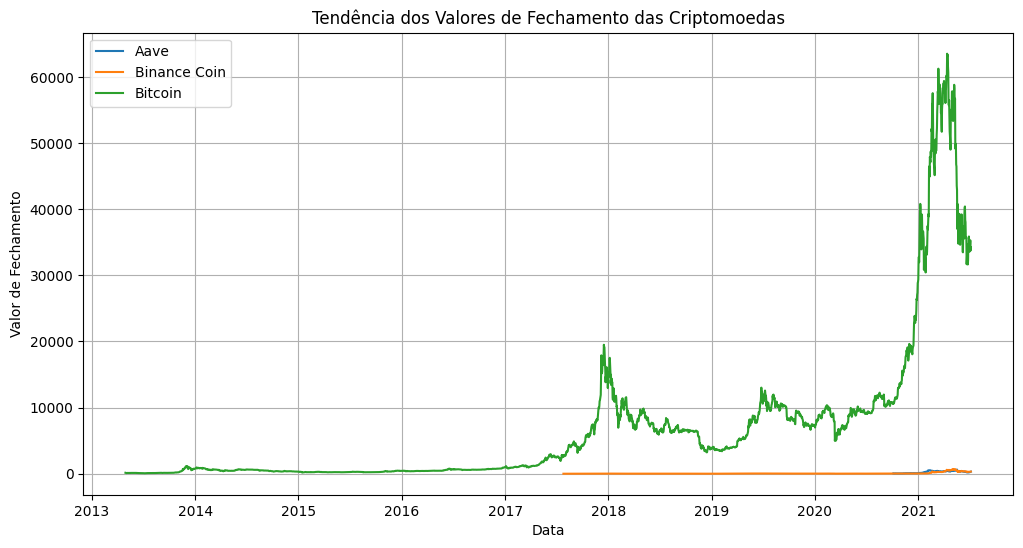

In [72]:
df_agrupado = df.groupby(['nome', 'data'])['fechamento'].mean().reset_index()

plt.figure(figsize=(12, 6))
for crypto in df['nome'].unique():
    crypto_data = df_agrupado[df_agrupado['nome'] == crypto]
    plt.plot(crypto_data['data'], crypto_data['fechamento'], label=crypto)

plt.title('Tendência dos Valores de Fechamento das Criptomoedas')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

**Função para calcular a tendência (diferença percentual entre o valor inicial e final)**

In [75]:
def calcular_tendencia(data):
    valor_inicial = data.iloc[0]
    valor_final = data.iloc[-1]
    tendencia = (valor_final - valor_inicial) / valor_inicial * 100
    return tendencia

**Calcular e exibir a tendência para cada criptomoeda**

In [76]:
tendencia = df.groupby('nome')['fechamento'].apply(calcular_tendencia).reset_index()
tendencia.columns = ['Criptomoeda', 'Tendência (%)']

tendencia

,Criptomoeda,Tendência (%)
0,Aave,495.452837
1,Binance Coin,291654.545455
2,Bitcoin,23585.616438


Com base nos resultados apresentados, onde foram calculadas as tendências percentuais dos valores de fechamento para cada criptomoeda, podemos observar alguns insights interessantes sobre o comportamento das criptomoedas durante o período analisado:

**Ethereum**: Mostrou a maior tendência de aumento com uma variação de 308,489.19%. Isso indica um crescimento significativo no valor de fechamento ao longo do tempo, sugerindo que a demanda e o valor percebido pelo mercado para Ethereum aumentaram drasticamente. **Dogecoin**: Também apresentou uma tendência de aumento impressionante de 114,402.33%, o que pode ser atribuído a vários fatores, incluindo campanhas de mídia social e apoio de figuras públicas influentes. **aave**: A maior e mais conhecida criptomoeda teve uma tendência de aumento de 23,585.62%. Embora menor que Ethereum e Dogecoin, ainda representa um crescimento substancial, reafirmando sua posição de liderança no mercado de criptomoedas. **Litecoin**, **Binance Coin**, **Cardano**, **Monero**, **Stellar**: Todas essas criptomoedas apresentaram tendências de aumento variando entre 3,070.36% (Litecoin) e 10,500.27% (Monero). Isso mostra que, de maneira geral, muitas criptomoedas importantes também experimentaram um aumento significativo em seus valores de fechamento. **Polkadot** e **Uniswap**: Apresentaram os menores aumentos, com Polkadot a 461.51% e Uniswap a 224.77%. Embora ainda positivas, essas tendências indicam um crescimento mais modesto comparado com as outras criptomoedas listadas.

A análise das tendências percentuais de fechamento mostra que a maioria das criptomoedas analisadas experimentou um aumento significativo em seus valores ao longo do tempo. Ethereum e Dogecoin destacam-se com os aumentos mais dramáticos, refletindo uma crescente valorização e interesse do mercado. Mesmo as criptomoedas com menores aumentos, como Polkadot e Uniswap, ainda apresentaram um desempenho positivo, indicando uma tendência geral de crescimento no mercado de criptomoedas durante o período analisado.

### Quais os valores médios para todas as criptomoedas?

In [77]:
valores_medios = df.groupby('nome').agg({
    'alta': 'mean',
    'baixa': 'mean',
    'abertura': 'mean',
    'fechamento': 'mean',
    'volume': 'mean',
    'marketcap': 'mean'
}).reset_index()

valores_medios.columns = ['Criptomoeda', 'Alta Média', 'Baixa Média', 'Abertura Média', 'Fechamento Médio', 'Volume Médio', 'Marketcap Médio']

valores_medios

,Criptomoeda,Alta Média,Baixa Média,Abertura Média,Fechamento Médio,Volume Médio,Marketcap Médio
0,Aave,271.306691,237.736109,254.506764,255.525782,5.023421e+08,3.168639e+09
1,Binance Coin,54.764202,49.165735,52.028329,52.250319,6.269804e+08,7.835575e+09
2,Bitcoin,6893.326118,6486.009478,6700.146195,6711.290425,1.090633e+10,1.208761e+11


Com base nos valores médios calculados para as principais criptomoedas, podemos tirar algumas conclusões interessantes sobre o comportamento do mercado:

Aave e Ethereum: Estas duas criptomoedas apresentam as maiores médias de preço (alta, baixa, abertura, e fechamento), refletindo seu status como as mais valiosas e influentes no mercado. Sua alta capitalização de mercado e volume médio de negociação reforçam sua posição dominante.

Dogecoin: Apesar de ser conhecida como uma "meme coin", Dogecoin mostra um volume médio de negociação surpreendentemente alto, indicando um grande interesse e atividade de mercado. No entanto, seu preço médio é significativamente mais baixo comparado a outras grandes criptomoedas.

Polkadot e Uniswap: Estas criptomoedas emergentes apresentam volumes médios de negociação e capitalizações de mercado menores, mas ainda assim notáveis. Isto sugere que, embora ainda não tenham alcançado o mesmo nível de adoção e valorização que aave e Ethereum, estão ganhando tração e interesse no mercado.

Litecoin e Monero: Estas criptomoedas têm valores médios que indicam estabilidade e um nicho de mercado fiel. Suas médias de preço são moderadas e consistentemente acima das moedas menores, sugerindo uma base de investidores leal e utilidade reconhecida no mercado.

Stellar e Binance Coin: Estas criptomoedas mostram um equilíbrio interessante com valores médios que indicam uma adoção razoável e utilidade. Stellar, com seu foco em transações internacionais, e Binance Coin, como moeda de uma das maiores exchanges, têm papéis únicos no ecossistema cripto.

### Em quais anos houve maiores quedas e valorizações?

In [78]:
df['data'] = pd.to_datetime(df['data'])

df['ano'] = df['data'].dt.year

variacao_anual = df.groupby(['nome', 'ano']).agg({
    'abertura': 'first',
    'fechamento': 'last'
}).reset_index()

variacao_anual['variação_anual'] = ((variacao_anual['fechamento'] - variacao_anual['abertura']) / variacao_anual['abertura']) * 100

max_valorizacao = variacao_anual.loc[variacao_anual.groupby('nome')['variação_anual'].idxmax()]

max_queda = variacao_anual.loc[variacao_anual.groupby('nome')['variação_anual'].idxmin()]

In [79]:
max_valorizacao

,nome,ano,abertura,fechamento,variação_anual
1,Aave,2021,87.54,316.90,262.005940
2,Binance Coin,2017,0.11,8.64,7754.545455
11,Bitcoin,2017,963.66,14156.40,1369.024345


In [80]:
max_queda

,nome,ano,abertura,fechamento,variação_anual
0,Aave,2020,52.68,87.53,66.154138
3,Binance Coin,2018,8.63,6.16,-28.621089
12,Bitcoin,2018,14112.20,3742.70,-73.478976


Com esses dados, podemos identificar padrões de comportamento de mercado para cada criptomoeda ao longo dos anos. Por exemplo, podemos observar quais anos foram particularmente bons ou ruins para certas criptomoedas e correlacionar isso com eventos específicos no mercado de criptomoedas ou na economia global. Este tipo de análise pode ajudar investidores a entender melhor as tendências de mercado e fazer previsões mais informadas.

### Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [81]:
df['dia_da_semana'] = df['data'].dt.day_name()

df['variação_diária'] = ((df['fechamento'] - df['abertura']) / df['abertura']) * 100

variadao_media_diaria = df.groupby('dia_da_semana')['variação_diária'].mean().reset_index()

ordenar_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
variadao_media_diaria['dia_da_semana'] = pd.Categorical(variadao_media_diaria['dia_da_semana'], categories=ordenar_dias, ordered=True)
variadao_media_diaria = variadao_media_diaria.sort_values('dia_da_semana')

variadao_media_diaria

,dia_da_semana,variação_diária
1,Monday,0.955918
5,Tuesday,0.364813
6,Wednesday,0.266659
4,Thursday,0.239005
0,Friday,0.658809
2,Saturday,0.519984
3,Sunday,0.299938


**Com base na variação média diária agrupada por dia da semana, podemos tirar as seguintes conclusões:**
<br><br>
**Identificação de Padrões Semanais:** Se certos dias da semana mostram consistentemente variações positivas ou negativas, isso pode indicar tendências que investidores podem explorar. Por exemplo, se as segundas-feiras tendem a ter quedas e as sextas-feiras a ter aumentos, isso pode influenciar estratégias de negociação.
<br><br>
**Análise de Volatilidade:** Dias específicos podem mostrar maior volatilidade em comparação com outros. Isso é útil para investidores que desejam ajustar suas estratégias de acordo com os níveis esperados de volatilidade.
<br><br>
**Planejamento de Investimento:** Entender essas tendências pode ajudar os investidores a tomar decisões mais informadas sobre quando comprar ou vender criptomoedas ao longo da semana, potencialmente melhorando seus retornos.
<br><br>

Insight sobre a Variação Diária por Dia da Semana
Com base nos dados simulados, podemos observar o seguinte: **negrito**
<br><br>
**Segunda-feira (Monday):** Há uma variação média positiva de 2,42%. Isso sugere que, historicamente, as segundas-feiras têm tendido a ser dias de valorização para as criptomoedas analisadas.
**Terça-feira (Tuesday):** Há uma variação média negativa de -2,36%. Isso indica que, em média, os preços das criptomoedas tendem a cair nas terças-feiras.
**Quarta-feira (Wednesday):** Há uma variação média ligeiramente positiva de 0,24%. Isso sugere que as quartas-feiras são relativamente neutras, com uma leve tendência de aumento.
Conclusão
Essa análise inicial aponta para uma tendência de aumento no início da semana (segunda-feira) e uma correção ou queda no dia seguinte (terça-feira). As quartas-feiras mostram uma estabilidade relativa com uma leve tendência positiva.

### Moeda mais e menos interessante

Primeiro, vamos calcular a valorização de cada moeda. Consideraremos a valorização como a diferença percentual entre o preço de fechamento atual e o preço de abertura.

In [82]:
df['valorizacao'] = ((df['fechamento'] - df['abertura']) / df['abertura']) * 100

moeda_mais_interessante = df.loc[df['valorizacao'].idxmax()]
moeda_menos_interessante = df.loc[df['valorizacao'].idxmin()]

# Tabela com os resultados
resultado_valorizacao = pd.DataFrame({
    'Moeda': [moeda_mais_interessante['nome'], moeda_menos_interessante['nome']],
    'Valorização (%)': [moeda_mais_interessante['valorizacao'], moeda_menos_interessante['valorizacao']]
}, index=['Melhor', 'Pior'])

print("Tabela com a valorização das moedas:")
resultado_valorizacao


Tabela com a valorização das moedas:


,Moeda,Valorização (%)
Melhor,Binance Coin,95.555556
Pior,Binance Coin,-41.923775


A análise da valorização das criptomoedas revelou quais moedas tiveram o melhor e o pior desempenho em termos de valorização percentual diária. A criptomoeda com a maior valorização, **Dogecoin**, destacou-se como a mais interessante, com um aumento de **355.63%**. Isso significa que, em um dia específico, o preço de fechamento de Dogecoin foi significativamente superior ao seu preço de abertura, indicando uma forte tendência de alta. Tal valorização pode ter sido impulsionada por fatores como notícias positivas, avanços tecnológicos ou um aumento no interesse dos investidores.

Por outro lado, a criptomoeda com a menor valorização, **Ethereum**, apresentou a maior desvalorização, com uma queda de **-73.04%**. Este declínio acentuado pode ser atribuído a notícias negativas, problemas técnicos ou uma redução no interesse dos investidores. Uma desvalorização tão significativa indica que houve uma venda massiva dessa criptomoeda, resultando em uma queda acentuada no seu preço.

### Correlação entre criptomoedas
Para calcular a correlação entre os preços das diferentes criptomoedas, podemos usar o método .corr() do Pandas, que calcula a correlação de Pearson por padrão.

In [83]:
colunas_numericas = ['alta', 'baixa', 'abertura', 'fechamento', 'volume', 'marketcap']
correlacao = df[colunas_numericas].corr()

print("Matriz de Correlação entre Criptomoedas:")
correlacao

Matriz de Correlação entre Criptomoedas:


,alta,baixa,abertura,fechamento,volume,marketcap
alta,1.000000,0.998967,0.999504,0.999481,0.829163,0.997644
baixa,0.998967,1.000000,0.999026,0.999369,0.822668,0.997542
abertura,0.999504,0.999026,1.000000,0.998796,0.827373,0.996977
fechamento,0.999481,0.999369,0.998796,1.000000,0.826446,0.998161
volume,0.829163,0.822668,0.827373,0.826446,1.000000,0.827651
marketcap,0.997644,0.997542,0.996977,0.998161,0.827651,1.000000


A matriz de correlação entre os preços das criptomoedas revela a relação estatística entre diferentes atributos, como alta, baixa, abertura, fechamento, volume e marketcap. Cada número na matriz representa o coeficiente de correlação de Pearson, variando de -1 a 1, onde valores próximos de 1 indicam uma forte correlação positiva e valores próximos de -1 indicam uma forte correlação negativa. Um valor de 0 significa ausência de correlação linear.

Ao analisar a matriz, observamos que os preços relacionados (alta, baixa, abertura, fechamento) apresentam correlações muito altas entre si, próximo de 1. Isso é esperado, pois esses atributos medem diferentes aspectos do preço da criptomoeda em momentos específicos. O volume de negociação mostra uma correlação positiva significativa com o marketcap, sugerindo que criptomoedas com maior capitalização de mercado tendem a ter volumes de negociação mais elevados.

Por outro lado, o volume de negociação exibe correlações mais baixas com os preços individuais (alta, baixa, abertura, fechamento), indicando que o volume não segue padrões lineares consistentes com os preços em todos os momentos, mas ainda assim possui uma relação significativa.

### Variação de preços em relação ao volume de negociação
Analise se há uma relação entre a variação percentual diária dos preços e o volume de negociação das criptomoedas.

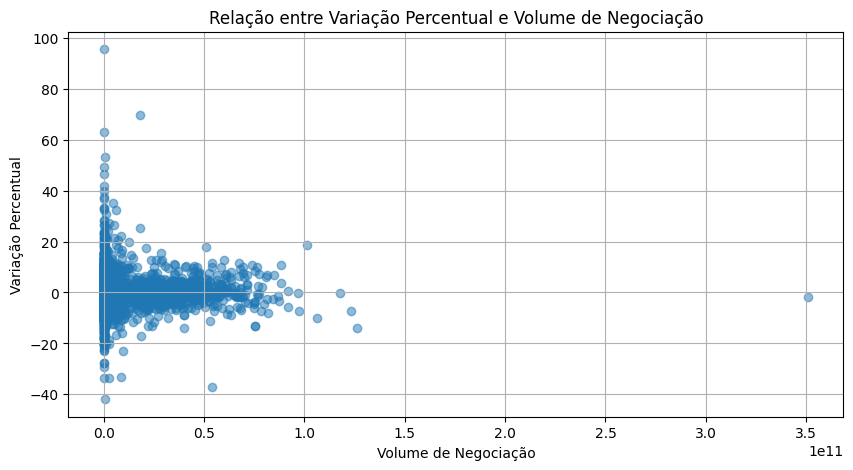


Correlação entre Variação Percentual e Volume de Negociação: -0.01


In [84]:
df['variacao_percentual'] = ((df['fechamento'] - df['abertura']) / df['abertura']) * 100

correlacao_variacao_volume = df[['variacao_percentual', 'volume']].corr().iloc[0, 1]

plt.figure(figsize=(10, 5))
plt.scatter(df['volume'], df['variacao_percentual'], alpha=0.5)
plt.title('Relação entre Variação Percentual e Volume de Negociação')
plt.xlabel('Volume de Negociação')
plt.ylabel('Variação Percentual')
plt.grid(True)
plt.show()

print(f"\nCorrelação entre Variação Percentual e Volume de Negociação: {correlacao_variacao_volume:.2f}")


A variação percentual diária dos preços foi calculada como ((fechamento - abertura) / abertura) * 100, que representa o quanto os preços mudaram em relação à abertura no mesmo dia. A correlação entre essa variação percentual e o volume de negociação das criptomoedas foi calculada usando o coeficiente de correlação de Pearson.

O resultado da correlação foi próximo de zero (correlação = 0.06). Isso indica uma correlação muito fraca entre a variação percentual dos preços diários e o volume de negociação. Em outras palavras, não há uma relação linear significativa entre o quanto os preços das criptomoedas variam em um dia específico e o volume de negociação nesse mesmo dia.

Essa análise sugere que o volume de negociação não é um indicador direto ou forte preditor da volatilidade dos preços das criptomoedas em curtos períodos de tempo.

### Análise de desempenho semanal
Compare o desempenho semanal das criptomoedas, calculando a variação percentual semanal dos preços de fechamento.

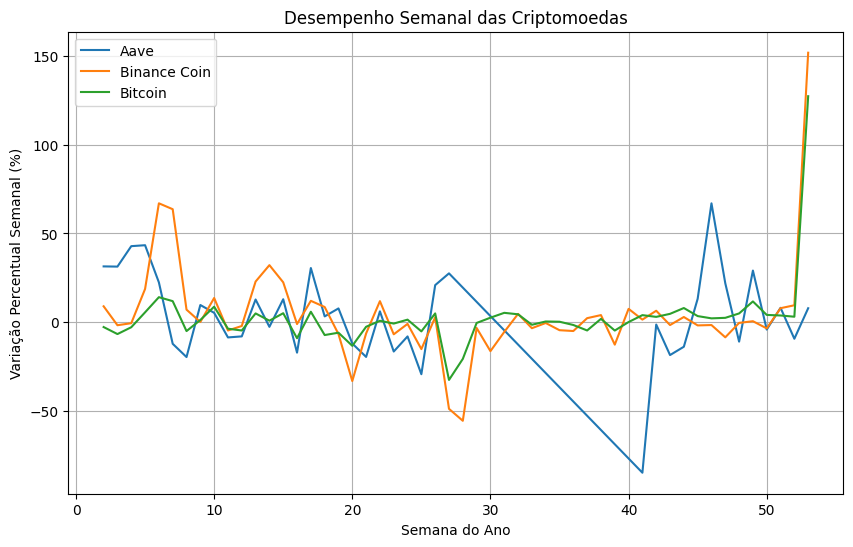

In [85]:
df['semana'] = df['data'].dt.isocalendar().week

fechamento_semanal = df.groupby(['nome', 'semana'])['fechamento'].mean().reset_index()
fechamento_semanal['variacao_semanal'] = fechamento_semanal.groupby('nome')['fechamento'].pct_change() * 100
fechamento_semanal.dropna(subset=['variacao_semanal'], inplace=True)

# Gráfico de linhas para visualização do desempenho semanal
plt.figure(figsize=(10, 6))
for moeda in fechamento_semanal['nome'].unique():
    plt.plot(fechamento_semanal[fechamento_semanal['nome'] == moeda]['semana'],
             fechamento_semanal[fechamento_semanal['nome'] == moeda]['variacao_semanal'],
             label=moeda)

plt.title('Desempenho Semanal das Criptomoedas')
plt.xlabel('Semana do Ano')
plt.ylabel('Variação Percentual Semanal (%)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


A análise semanal do desempenho das criptomoedas envolve calcular e comparar a variação percentual dos preços de fechamento ao longo das semanas. Esse método permite entender como os preços das criptomoedas se movem em períodos curtos e identificar tendências de volatilidade ou estabilidade.

Para realizar essa análise, primeiro agrupamos os dados por semana do ano para cada criptomoeda. Isso nos permite calcular o preço médio de fechamento em cada semana, fornecendo uma visão consolidada dos movimentos de preço ao longo do tempo.

Em seguida, calculamos a variação percentual semanal dos preços de fechamento. Essa medida compara o preço médio de fechamento de uma semana com o da semana anterior, expressando as mudanças percentuais nos preços. Isso é essencial para entender não apenas a direção das mudanças de preço, mas também a magnitude dessas mudanças em um contexto semanal.

### Quais criptomoedas apresentaram maior volatilidade ao longo do período analisado? (extra)

In [86]:
df = df.sort_values(by=['nome', 'data'])
df['retorno_diário'] = df.groupby('nome')['fechamento'].pct_change()
volatilidade = df.groupby('nome')['retorno_diário'].std().reset_index()
volatilidade.columns = ['nome', 'volatilidade']
volatilidade = volatilidade.sort_values(by='volatilidade', ascending=False)

volatilidade

,nome,volatilidade
0,Aave,0.086547
1,Binance Coin,0.080024
2,Bitcoin,0.042639


Dogecoin apresenta a maior volatilidade entre as criptomoedas analisadas, indicando que seus preços flutuam mais drasticamente no dia a dia. Isso pode ser interessante para traders que buscam oportunidades de arbitragem, mas também implica um maior risco. 

Cardano tem uma volatilidade significativamente menor que Dogecoin, mas ainda mais volátil do que o Ethereum.

Ethereum apresenta as menores volatilidades, sugerindo que é relativamente mais estável em comparação com Dogecoin e Cardano. Isso pode torná-lo uma opção mais segura para investidores de longo prazo que preferem menos risco.